# Forth Stage

In [1]:
import sys
sys.path.append('..')
from get_data import *
from simulation import *
from optimization import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import tqdm
import seaborn as sns
import os
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
res_dict = {}  # Target dictionary to store results, don't update this dictionary for testing different objective function params

In [6]:
path_df = get_path_df()

# Limit to certain params only
path_df = path_df.loc[(files_df['ts'].astype(int) <= 20) & (files_df['tm'].astype(int) <= 20)].reset_index(drop=True)

res_dict = calc_sim_results(path_df=path_df)

### Optimization Result of 1 Set of Objective Function Params

2022-11-17 03:27:33.184 | INFO     | optimization.py     :   73 | Plotting 2330 - bid - z_score
2022-11-17 03:27:33.721 | INFO     | optimization.py     :   73 | Plotting 2330 - bid - score_mean
2022-11-17 03:27:34.299 | INFO     | optimization.py     :   73 | Plotting 2330 - bid - score_std
2022-11-17 03:27:35.079 | INFO     | optimization.py     :   73 | Plotting 2330 - bid - eoq_%
2022-11-17 03:27:36.145 | INFO     | optimization.py     :   73 | Plotting 2330 - bid - take_%


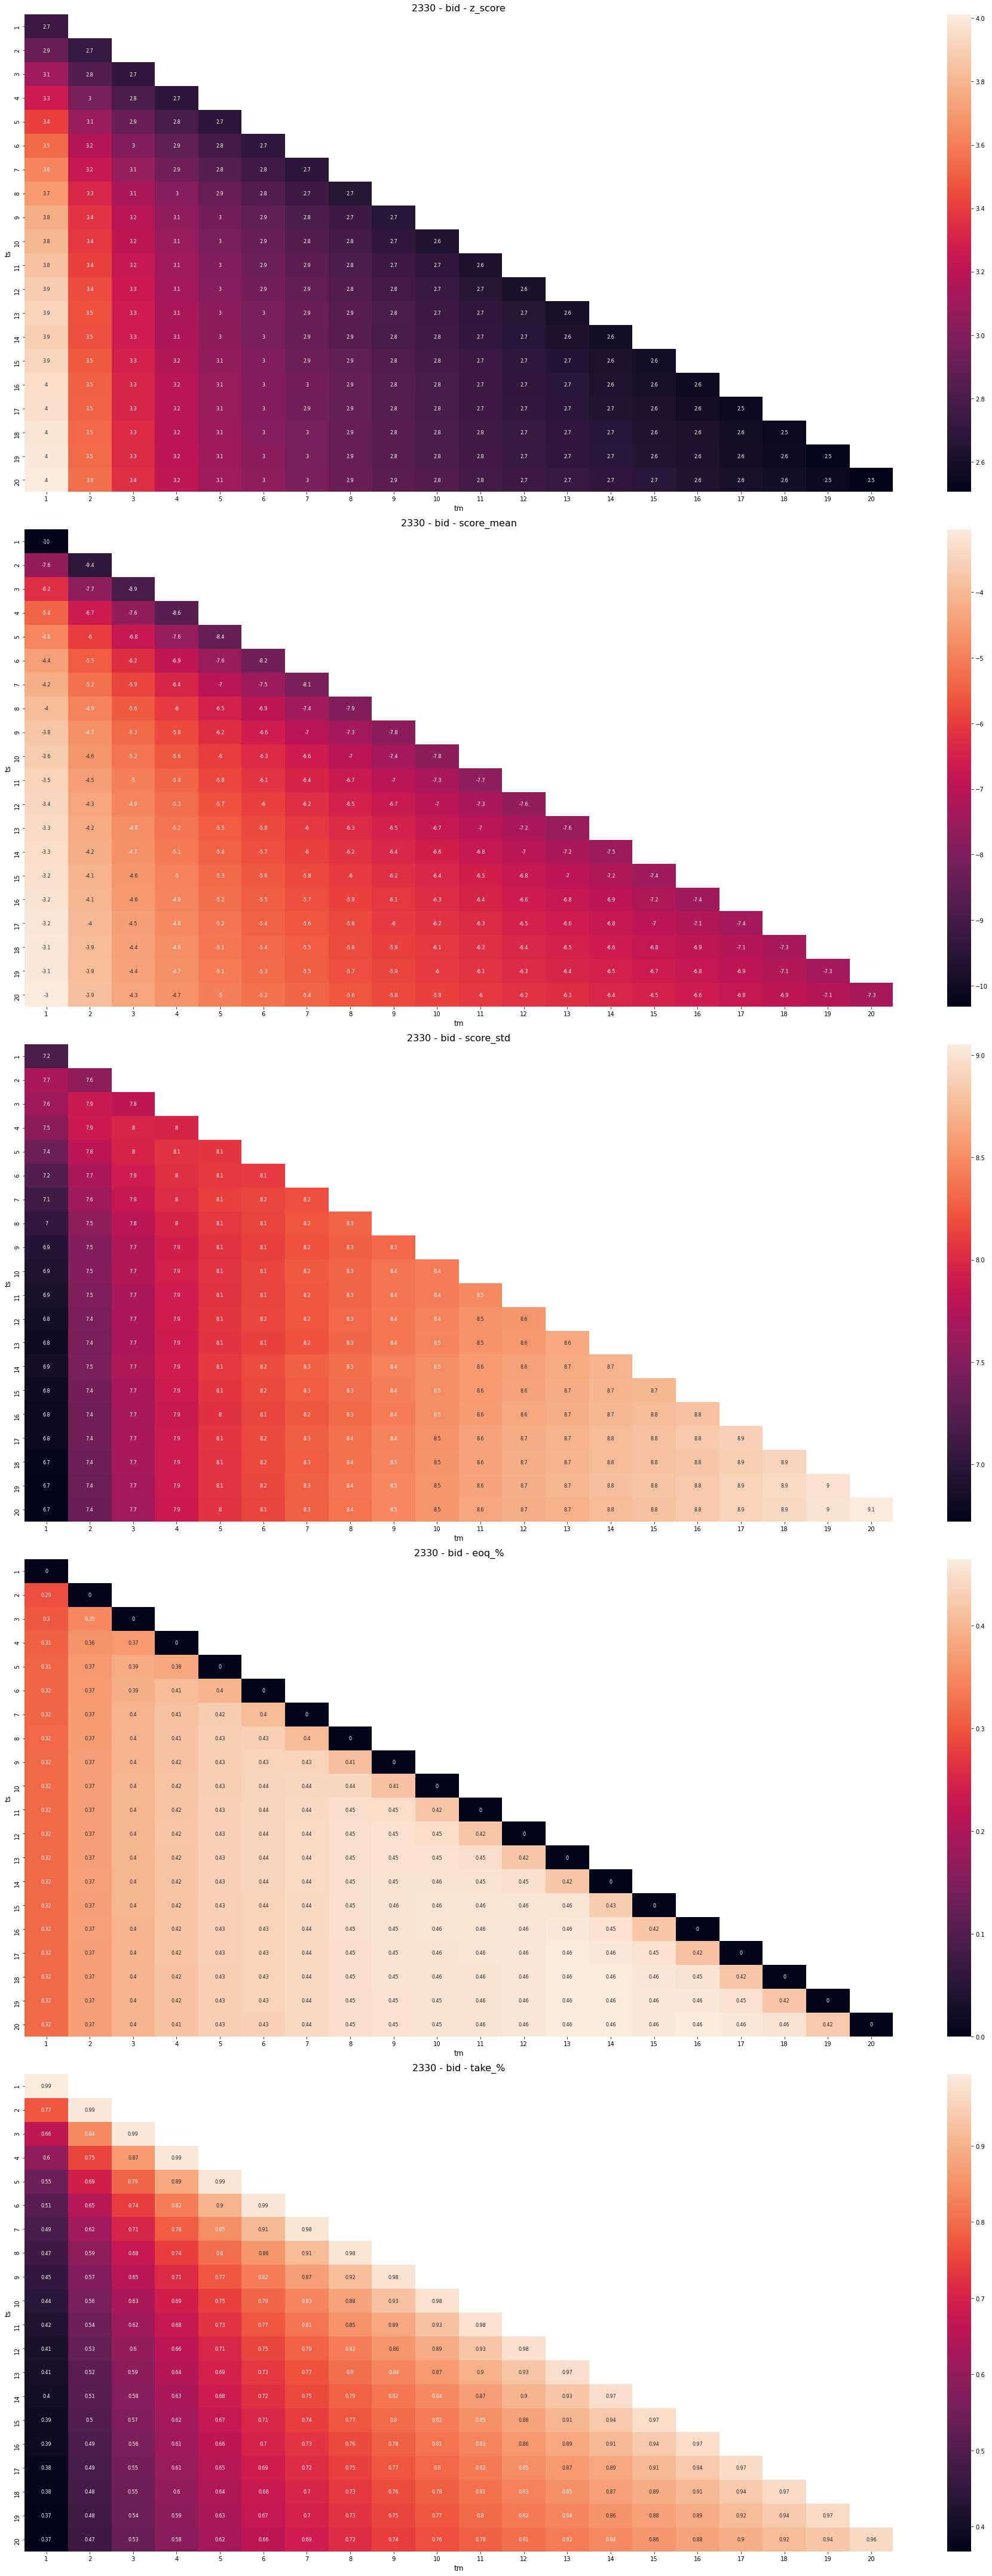

In [9]:
plot_heatmap(stock_code_ls=['2330'], side_ls=['bid'], plot_attri_ls=['z_score', 'score_mean', 'score_std', 'eoq_%', 'take_%'], res_dict=res_dict)

2022-11-17 03:27:44.175 | INFO     | optimization.py     :   73 | Plotting 0050 - bid - z_score
2022-11-17 03:27:44.584 | INFO     | optimization.py     :   73 | Plotting 0050 - bid - score_mean
2022-11-17 03:27:45.239 | INFO     | optimization.py     :   73 | Plotting 0050 - bid - score_std
2022-11-17 03:27:46.008 | INFO     | optimization.py     :   73 | Plotting 0050 - bid - eoq_%
2022-11-17 03:27:47.010 | INFO     | optimization.py     :   73 | Plotting 0050 - bid - take_%


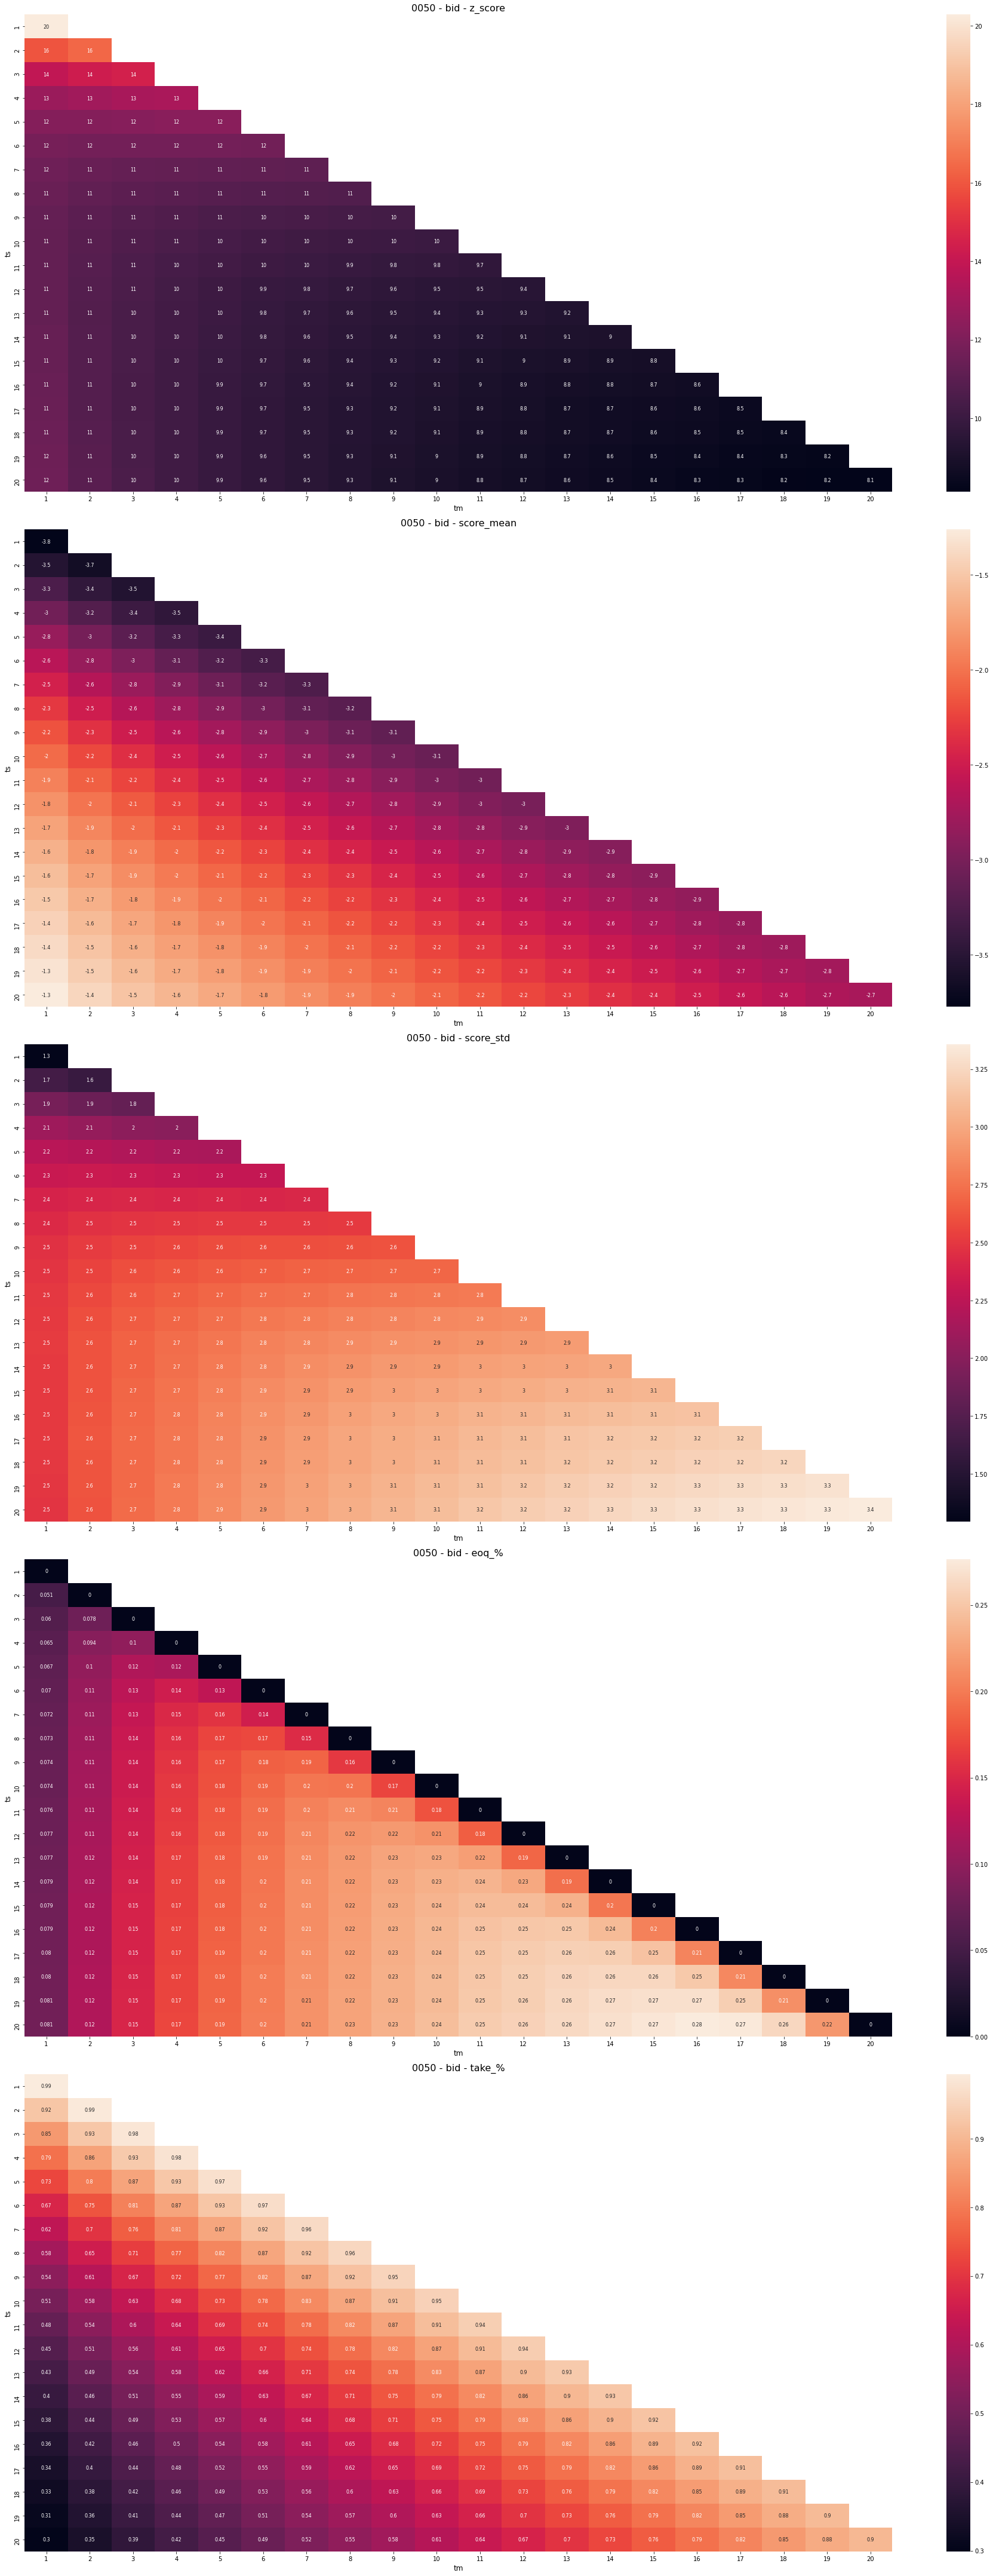

In [10]:
plot_heatmap(stock_code_ls=['0050'], side_ls=['bid'], plot_attri_ls=['z_score', 'score_mean', 'score_std', 'eoq_%', 'take_%'], res_dict=res_dict)

In [ ]:
plot_heatmap(stock_code_ls=['0050'], side_ls=['bid'], plot_attri_ls=['z_score', 'score_mean', 'score_std', 'eoq_%', 'take_%'], res_dict=res_dict)

### Vary Lambda

In [ ]:
lmda_ls = list(range(1, 11))
for k, df in tqdm.tqdm(gb, desc='VaryingLambda', ncols=200, total=len(gb.groups)):
    if k not in res_dict.keys():
        res_dict[k] = get_sim_res(path_ls=df['path'].unique().tolist())
    obj_kwargs_ls = [{'lmda': i, 't_func': lambda x: np.sqrt(x / 1000.)} for i in lmda_ls]
    res_score_ls = [obj2(res_dict[k]['pnl'], res_dict[k]['duration'], **obj_kwargs) for obj_kwargs in obj_kwargs_ls]
    res_score_ls = [res_score[np.logical_and(~np.isnan(res_score), ~np.isinf(res_score))] for res_score in res_score_ls]
    res_dict[k].update({
        'score_ls': res_score_ls, 
        'score_mean_ls': [np.nanmean(res_score) for res_score in res_score_ls], 
        'score_std_ls': [np.nanstd(res_score) for res_score in res_score_ls]
    })

In [ ]:
target_stock_code = '2330'
target_side = 'bid'

In [ ]:
plot_key_ls = [(target_stock_code, target_side, str(i), str(i)) for i in range(10, 210, 10)]
plot_attri = 'score_mean'
fig, ax = plt.subplots(figsize=(22, 8))
colors = [(1 - i, 0.5, i / 2) for i in np.linspace(0, 1, len(plot_key_ls))]
for i, k in enumerate(plot_key_ls):
    plot_line = res_dict[k][f'{plot_attri}_ls']
    ax.plot(lmda_ls, plot_line, label='-'.join(k), color=colors[i])
ax.set_title(f'{target_stock_code} | {target_side} | X = lambda - Y = {plot_attri}')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plot_key_ls = [(target_stock_code, target_side, str(i), str(i)) for i in range(10, 210, 10)]
plot_attri = 'score_std'
fig, ax = plt.subplots(figsize=(22, 8))
colors = [(1 - i, 0.5, i / 2) for i in np.linspace(0, 1, len(plot_key_ls))]
for i, k in enumerate(plot_key_ls):
    plot_line = res_dict[k][f'{plot_attri}_ls']
    ax.plot(lmda_ls, plot_line, label='-'.join(k), color=colors[i])
ax.set_title(f'{target_stock_code} | {target_side} | X = lambda - Y = {plot_attri}')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plot_key_ls = [(target_stock_code, target_side, str(i), str(i // 2)) for i in range(10, 210, 10)]
plot_attri = 'score_mean'
fig, ax = plt.subplots(figsize=(22, 8))
colors = [(1 - i, 0.5, i / 2) for i in np.linspace(0, 1, len(plot_key_ls))]
for i, k in enumerate(plot_key_ls):
    plot_line = res_dict[k][f'{plot_attri}_ls']
    ax.plot(lmda_ls, plot_line, label='-'.join(k), color=colors[i])
ax.set_title(f'{target_stock_code} | {target_side} | X = lambda - Y = {plot_attri}')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plot_key_ls = [('2330', 'bid', str(i), str(i)) for i in range(10, 210, 10)]
plot_attri = 'score_std'
fig, ax = plt.subplots(figsize=(22, 8))
colors = [(1 - i, 0.5, i / 2) for i in np.linspace(0, 1, len(plot_key_ls))]
for i, k in enumerate(plot_key_ls):
    plot_line = res_dict[k][f'{plot_attri}_ls']
    ax.plot(lmda_ls, plot_line, label='-'.join(k), color=colors[i])
ax.set_title(f'{target_stock_code} | {target_side} | X = lambda - Y = {plot_attri}')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()